In [12]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Verificación de GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo en uso: {device}")

Dispositivo en uso: cuda


In [13]:

D_in, H1, H2, D_out = 32*32*3, 100, 50, 10  # Ajustado para imágenes 32x32x3

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, D_out)
).to(device)
print("Modelo definido correctamente.")
print(model)

Modelo definido correctamente.
Sequential(
  (0): Linear(in_features=3072, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
)


Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.658187370329667..2.126488706365503].



Resumen de datos:
Entrenamiento: (40000, 32, 32, 3), (40000,)
Prueba: (10000, 32, 32, 3), (10000,)


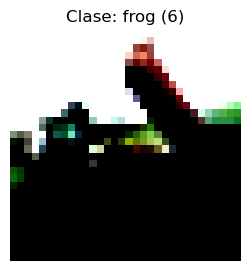

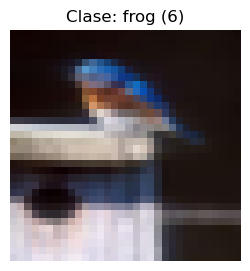

In [14]:
# Celda 3 Corregida
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True
)

# Conversión a NumPy
x_2 = np.array(trainset.data, dtype=np.float32)  # (50000, 32, 32, 3)
y_2 = np.array(trainset.targets, dtype=np.int32)  # (50000,)

# Media y desviación estándar de CIFAR-10 canles RGB
mean = np.array([0.4914, 0.4822, 0.4465])
std = np.array([0.2452, 0.2435, 0.2616])

# Normalización de los datos
x_2 = (x_2 / 255.0 - mean.reshape(1, 1, 1, 3)) / std.reshape(1, 1, 1, 3)


# División de datos
X_train = x_2[:40000]  
X_test = x_2[40000:]
y_train = y_2[:40000].copy()
y_test = y_2[40000:].copy()

# # Normalización y división
# X_train = x_2[:40000] / 255.0  # float32 en [0,1]
# X_test = x_2[40000:] / 255.0
# y_train = y_2[:40000].copy()
# y_test = y_2[40000:].copy()

print("\nResumen de datos:")
print(f"Entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Prueba: {X_test.shape}, {y_test.shape}")

# Visualización CORRECTA (3 opciones, usa solo una):
# Opción recomendada:
plt.figure(figsize=(3,3))
plt.imshow(X_train[2])  # float32 en [0,1]
plt.title(f"Clase: {trainset.classes[y_train[0]]} ({y_train[0]})")
plt.axis('off')
plt.show()

plt.figure(figsize=(3,3))
img = (X_train[13] * std + mean)  # Desnormalización
img = np.clip(img, 0, 1)  # Asegurarse de que esté en [0,1]
plt.imshow(img)  # float32 en [0,1]
plt.title(f"Clase: {trainset.classes[y_train[0]]} ({y_train[0]})")
plt.axis('off')
plt.show()


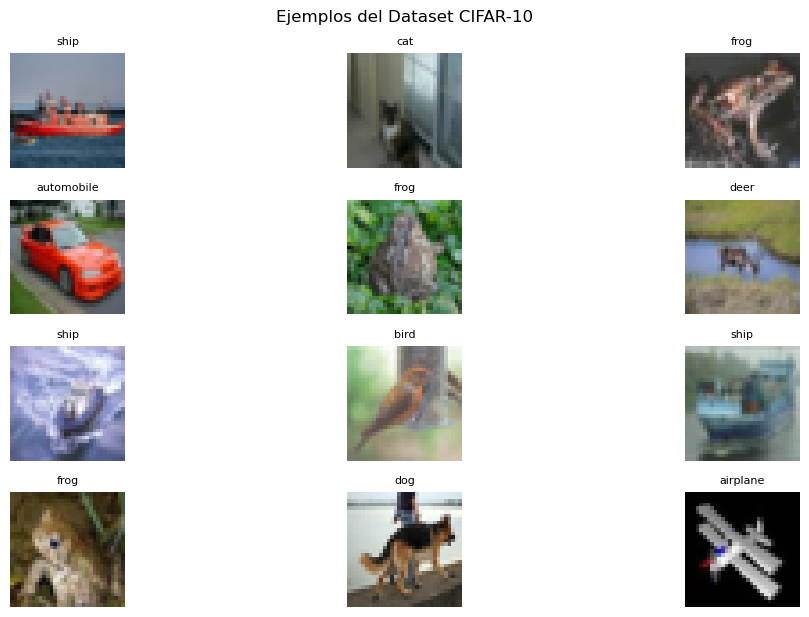

In [15]:

# Configuración de la visualización
n_rows = 4
n_cols = 3
plt.figure(figsize=(12, 6))

# Mostrar varias imágenes aleatorias
for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    # Seleccionar una imagen aleatoria
    idx = np.random.randint(0, len(trainset))
    image, label = trainset[idx]
    
    # Mostrar la imagen
    plt.imshow(image)
    plt.title(trainset.classes[label], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Ejemplos del Dataset CIFAR-10', y=1.02)
plt.show()

In [16]:
# Celda 4: Conversión a tensores PyTorch
X_t = torch.from_numpy(X_train.reshape(40000, -1)).float().to(device)  # Aplanar imágenes
Y_t = torch.from_numpy(y_train).long().to(device)
X_test_t = torch.from_numpy(X_test.reshape(10000, -1)).float().to(device)

print("\nTensores creados:")
print(f"X_t shape: {X_t.shape}")
print(f"Y_t shape: {Y_t.shape}")
print(f"X_test_t shape: {X_test_t.shape}")


Tensores creados:
X_t shape: torch.Size([40000, 3072])
Y_t shape: torch.Size([40000])
X_test_t shape: torch.Size([10000, 3072])


In [17]:
# Celda 5: Funciones personalizadas de pérdida
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), axis=1, keepdims=True)

def cross_entropy(outputs, target):
    logits = outputs[torch.arange(len(outputs)), target]
    loss = -logits + torch.log(torch.sum(torch.exp(outputs), axis=1))
    return loss.mean()

# Prueba de las funciones
test_output = torch.randn(3, 10).to(device)
test_target = torch.tensor([1, 2, 3]).to(device)
print("\nPrueba funciones pérdida:")
print("Softmax:", softmax(test_output).shape)
print("CrossEntropy:", cross_entropy(test_output, test_target).item())


Prueba funciones pérdida:
Softmax: torch.Size([3, 10])
CrossEntropy: 2.2528181076049805


Época 10/350 - Pérdida: 1.58843
Época 20/350 - Pérdida: 1.55462
Época 30/350 - Pérdida: 1.53196
Época 40/350 - Pérdida: 1.51475
Época 50/350 - Pérdida: 1.50069
Época 60/350 - Pérdida: 1.48875
Época 70/350 - Pérdida: 1.47845
Época 80/350 - Pérdida: 1.46938
Época 90/350 - Pérdida: 1.46139
Época 100/350 - Pérdida: 1.45435
Época 110/350 - Pérdida: 1.44815
Época 120/350 - Pérdida: 1.44271
Época 130/350 - Pérdida: 1.43800
Época 140/350 - Pérdida: 1.43389
Época 150/350 - Pérdida: 1.43025
Época 160/350 - Pérdida: 1.42701
Época 170/350 - Pérdida: 1.42413
Época 180/350 - Pérdida: 1.42156
Época 190/350 - Pérdida: 1.41922
Época 200/350 - Pérdida: 1.41707
Época 210/350 - Pérdida: 1.41509
Época 220/350 - Pérdida: 1.41324
Época 230/350 - Pérdida: 1.41151
Época 240/350 - Pérdida: 1.40985
Época 250/350 - Pérdida: 1.40826
Época 260/350 - Pérdida: 1.40672
Época 270/350 - Pérdida: 1.40524
Época 280/350 - Pérdida: 1.40379
Época 290/350 - Pérdida: 1.40239
Época 300/350 - Pérdida: 1.40104
Época 310/350 - Pér

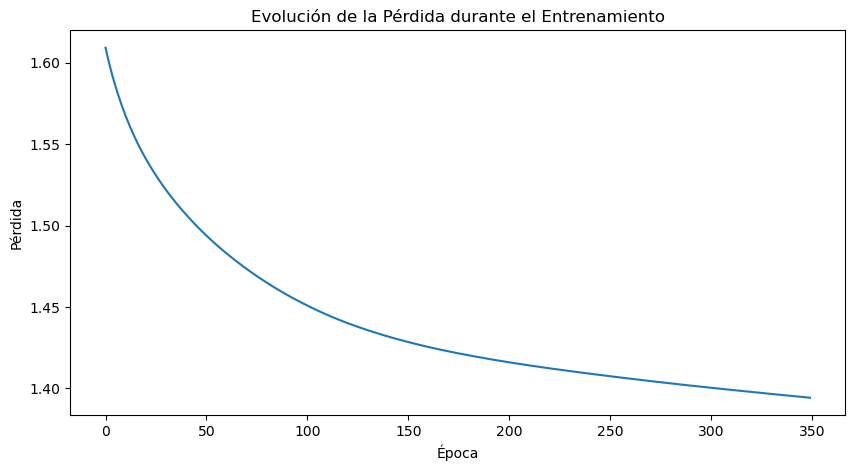

In [19]:
# Celda 6: Bucle de entrenamiento
epochs =350
lr = 0.01
log_each = 10
loss_history = []

for epoch in range(1, epochs+1):
    # Forward pass
    y_pred = model(X_t)
    
    # Cálculo de pérdida
    loss = cross_entropy(y_pred, Y_t)
    loss_history.append(loss.item())
    
    # Backpropagation
    model.zero_grad()
    loss.backward()
    
    # Actualización manual de pesos
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
    
    # Reemplazo con optimizador Adam
    # optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # Mostrar progreso
    if epoch % log_each == 0:
        avg_loss = np.mean(loss_history[-log_each:])
        print(f"Época {epoch}/{epochs} - Pérdida: {avg_loss:.5f}")

# Gráfico de pérdida
plt.figure(figsize=(10,5))
plt.plot(loss_history)
plt.title("Evolución de la Pérdida durante el Entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.show()

In [20]:
# Celda 8: Creación de DataFrame para análisis
X_flatten = X_train.reshape(40000, -1)
df = pd.DataFrame(X_flatten, columns=[f"pixel_{i}" for i in range(X_flatten.shape[1])])

print("\nDataFrame de muestra (primeras 5 imágenes):")
display(df.head())

# Estadísticas descriptivas
print("\nEstadísticas de los píxeles:")
display(df.describe())


DataFrame de muestra (primeras 5 imágenes):


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,-1.060471,-0.981777,-0.762390,-1.316364,-1.239457,-1.032223,-1.204411,-1.207247,-1.062204,-0.916531,...,-0.147771,1.450485,0.983033,0.391895,0.410917,-0.079897,-0.447585,-0.036897,-0.498627,-0.627473
1,0.458897,0.870298,1.096458,0.011083,0.226098,0.331932,-0.324777,-0.305367,-0.282687,-0.372757,...,0.331932,0.282970,0.161678,0.376904,0.282970,0.177783,0.421876,0.282970,0.161678,0.451857
2,2.074225,2.126489,2.115826,2.042238,2.094279,2.085844,2.042238,2.094279,2.085844,2.042238,...,-0.522538,-0.756597,-0.611362,-0.462576,-0.740604,-0.611362,-0.462576,-0.724611,-0.595257,-0.447585
3,-1.556265,-1.577662,-1.556897,-1.412324,-1.432717,-1.421981,-1.396331,-1.416612,-1.406990,-1.332358,...,-1.137157,-1.140438,-1.223352,-1.287065,-0.996497,-1.078407,-1.152148,-0.852557,-0.933462,-1.017232
4,0.714791,0.918613,1.261356,0.682804,0.886403,1.231374,0.826744,0.999138,1.336309,0.922704,...,-0.537529,-0.804577,-0.707992,-0.477566,-0.868551,-0.772412,-0.537529,-0.836564,-0.740202,-0.507548



Estadísticas de los píxeles:


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.089437,0.212233,0.280177,0.079816,0.201801,0.268984,0.094820,0.215096,0.280144,0.103307,...,0.002963,0.027852,0.047760,0.002762,0.024056,0.046156,0.003695,0.024897,0.049514,0.010745
std,1.173910,1.174728,1.205881,1.158290,1.158334,1.192847,1.154635,1.154300,1.189984,1.150879,...,0.971682,1.024497,0.993101,0.974527,1.028461,0.997780,0.979980,1.040647,1.011123,0.992953
min,-2.004078,-1.980287,-1.706804,-2.004078,-1.980287,-1.706804,-2.004078,-1.980287,-1.706804,-2.004078,...,-1.706804,-2.004078,-1.980287,-1.706804,-2.004078,-1.980287,-1.706804,-2.004078,-1.980287,-1.706804
25%,-0.868551,-0.740202,-0.792371,-0.868551,-0.724097,-0.792371,-0.836564,-0.707992,-0.777381,-0.836564,...,-0.747399,-0.740604,-0.675782,-0.747399,-0.740604,-0.675782,-0.747399,-0.756597,-0.691887,-0.762390
50%,0.043070,0.209993,0.212006,0.027077,0.193888,0.197015,0.059064,0.209993,0.212006,0.075057,...,-0.117789,-0.004910,0.016733,-0.117789,-0.020903,0.000628,-0.117789,-0.020903,0.000628,-0.117789
75%,1.018664,1.176293,1.396272,1.002671,1.127978,1.381281,1.002671,1.144083,1.381281,1.002671,...,0.646737,0.762771,0.709248,0.646737,0.746777,0.725353,0.661727,0.762771,0.725353,0.676718
max,2.074225,2.126489,2.115826,2.074225,2.126489,2.115826,2.074225,2.126489,2.115826,2.074225,...,2.115826,2.074225,2.126489,2.115826,2.074225,2.126489,2.115826,2.074225,2.126489,2.115826


In [21]:
from sklearn.metrics import accuracy_score

# Definir la función de evaluación
def evaluate(x):
    model.eval()  # Cambiar el modelo a modo evaluación
    with torch.no_grad():  # No calcular gradientes (reduce memoria y tiempo)
        y_pred = model(x)  # Predicciones del modelo (logits)
        y_probas = torch.nn.functional.softmax(y_pred, dim=1)  # Convertir a probabilidades
        return torch.argmax(y_probas, axis=1)  # Tomar la clase con mayor probabilidad

# Convertimos X_test a tensor de PyTorch con el tamaño correcto
X_test_tensor = torch.from_numpy(X_test.reshape(-1, 3072)).float().cuda()  # (10000, 3072)

# Evaluamos el modelo en los datos de prueba
y_pred = evaluate(X_test_tensor)

# Convertimos a numpy y movemos a la CPU para comparación
accuracy = accuracy_score(y_test, y_pred.cpu().numpy())

print(f"Precisión del modelo en CIFAR-10: {accuracy:.4f}")  # Debería imprimir algo como 0.8948

Precisión del modelo en CIFAR-10: 0.4608
